predict ?

72
auswahl an anweisungen die immer bei einembefehl ausgeführt werden???

return x

2.12 ND 2,3,4 ??? wie sehen diese Autos aus

append?

12: add a small number to diagonal


HOMEWORK

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data -O car_fuel_efficiency.csv

--2025-10-07 12:07:11--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
185.199.109.133, 185.199.110.133, 185.199.108.133, ...tent.com)... 
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.1s    

2025-10-07 12:07:12 (7.77 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

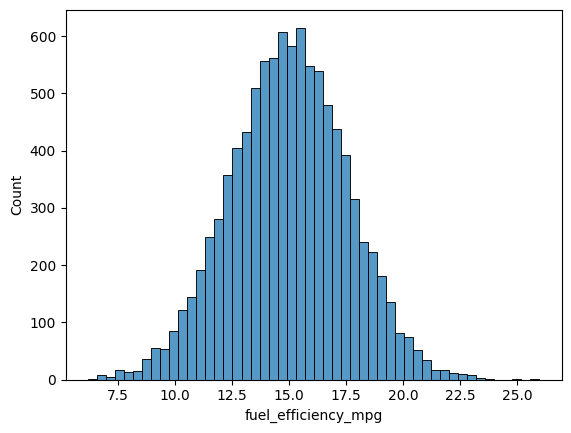

In [7]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail? NO

### Question 1
There's one column with missing values. What is it?

In [8]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

'horsepower'

### Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [9]:
df['horsepower'].median()

149.0

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [10]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n

9704

Datenset gesplittet 60/20/20

In [12]:
idx = np.arange(n)

In [13]:
np.random.seed(42)

np.random.shuffle(idx)


Datenset geshuffelt

In [14]:
df_train = df.iloc[idx[:n_train]]
#df_val = df.iloc[idx[n_train:n_train+n_val]]
#df_test = df.iloc[idx[n_train+n_val:]]

In [15]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


### Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?


In [16]:
df_0 = df.fillna(0)

fehlende Werte durch Null ersetzt und Fkt als df_0 definiert

In [17]:
df_mean = df.fillna(df_train.horsepower.mean())

fehlende Werte durch mean des trainingsdatensets von horsepower ersetzt und Fkt als df_mean definiert


Ein Modell mit linearer Regression trainieren mit fehlenden Werten = 0:

In [18]:
df_0_train = df_0.iloc[idx[:n_train]]
df_0_val = df_0.iloc[idx[n_train:n_train+n_val]]
df_0_test = df_0.iloc[idx[n_train+n_val:]]

df_mean_train = df_mean.iloc[idx[:n_train]]
df_mean_val = df_mean.iloc[idx[n_train:n_train+n_val]]
df_mean_test = df_mean.iloc[idx[n_train+n_val:]]

In [19]:
df_0_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [20]:
for df in [df_0_train, df_0_val, df_0_test, df_mean_train, df_mean_val, df_mean_test]:
    print(len(df))
    df.reset_index(drop=True, inplace=True)

5824
1940
1940
5824
1940
1940


In [21]:
df_0_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094
5821,210,152.0,2500.175687,2020,17.593237
5822,250,154.0,2254.313245,2002,18.925748


In [22]:
def train_test_val_split(df, idx):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    return df_train, df_val, df_test

In [23]:
df_0_train, df_0_val, df_0_test = train_test_val_split(df_0, idx)
df_mean_train, df_mean_val, df_mean_test = train_test_val_split(df_mean, idx)

In [24]:
def X_y_split(df):
    cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

    X = df[cols].values
    y = df['fuel_efficiency_mpg'].values

    return X, y

In [25]:
X_0_train, y_0_train = X_y_split(df_0_train)
X_0_val, y_0_val = X_y_split(df_0_val)
X_0_test, y_0_test = X_y_split(df_0_test)

X_mean_train, y_mean_train = X_y_split(df_mean_train)
X_mean_val, y_mean_val = X_y_split(df_mean_val)
X_mean_test, y_mean_test = X_y_split(df_mean_test)

#X_0_train, y_0_train,X_0_val, y_0_val, X_0_test, y_0_test, X_mean_train, y_0_train, X_mean_val, y_0_val, X_mean_test, y_0_test

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [27]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [28]:
w_0_0, w_0 = train_linear_regression(X_0_train, y_0_train)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_mean_train)

In [29]:
y_0_pred = w_0_0 + X_0_train.dot(w_0)
y_mean_pred = w_0_mean + X_mean_train.dot(w_mean)

y_0_pred_test = w_0_0 + X_0_test.dot(w_0)
y_mean_pred_test = w_0_0 + X_mean_test.dot(w_mean)

y_0_pred_val = w_0_0 + X_0_val.dot(w_0)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [30]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [31]:
round(rmse(y_0_val, y_0_pred_val), 2), round(rmse(y_0_val, y_mean_pred_val), 2)

(0.52, 0.46)

es ist besser mit dem mean


## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

In [32]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [33]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [34]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_0_train, y_0_train, r=r)

    X_0_val = prepare_X(df_0_val)
    y_0_pred = w_0 + X_0_val.dot(w)
    score = rmse(y_0_val, y_0_pred)

    print("r=", r,"     w_0=", round(w_0, 2), "   rmse=", round(score, 2))

r= 0      w_0= 28.83    rmse= 0.52
r= 0.01      w_0= 24.93    rmse= 0.52
r= 0.1      w_0= 11.24    rmse= 0.52
r= 1      w_0= 1.73    rmse= 0.52
r= 5      w_0= 0.36    rmse= 0.52
r= 10      w_0= 0.18    rmse= 0.52
r= 100      w_0= 0.02    rmse= 0.52


In [35]:
X_0_train = prepare_X(df_0_train)
w0, w = train_linear_regression_reg(X_0_train, y_0_train, r=0.0)

X_0_val = prepare_X(df_0_val)
y_0_pred = w_0 + X_0_val.dot(w)
print('validation:', rmse(y_0_val, y_0_pred))

X_0_test = prepare_X(df_0_test)
y_0_pred = w_0 + X_0_test.dot(w)
print('test:', rmse(y_0_test, y_0_pred))

validation: 28.812024672654253
test: 28.82979741108208


r = 0

### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [36]:
def train_test_val_split(df, idx):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    return df_train, df_val, df_test

In [37]:
score = np.zeros(10)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_0_train, df_0_val, df_0_test = train_test_val_split(df_0, idx)
    X_train, y_train = X_y_split(df_0_train)
    X_test, y_test = X_y_split(df_0_test)
    X_val, y_val = X_y_split(df_0_val)

    w_0, w = train_linear_regression(X_train, y_train)

    #X_test = prepare_X(df_0_test)
    #y_pred = w_0 + X_train.dot(w)

    #X_train = prepare_X(df_0_train)
    #w_0, w = train_linear_regression(X_train, y_train)

    #y_pred = w_0 + X_train.dot(w)
   # print('train:', rmse(y_train, y_pred))

    #X_val = prepare_X(df_0_val)
    y_pred = w_0 + X_val.dot(w)
    #print('validation:', rmse(y_val, y_pred))

    score[seed] = rmse(y_val, y_pred)

    print("seed=%s, w_0=%s, score=%s" % (seed, round(w_0, 2), round(score[seed], 2)))


    #score[seed] = rmse(y_train, y_pred)


seed=0, w_0=27.38, score=0.52
seed=1, w_0=29.02, score=0.52
seed=2, w_0=25.9, score=0.52
seed=3, w_0=28.02, score=0.52
seed=4, w_0=25.93, score=0.51
seed=5, w_0=25.9, score=0.53
seed=6, w_0=25.92, score=0.53
seed=7, w_0=28.41, score=0.51
seed=8, w_0=26.48, score=0.51
seed=9, w_0=27.51, score=0.51


In [38]:
score

array([0.52065313, 0.52133889, 0.522807  , 0.51595167, 0.51091295,
       0.52834065, 0.53139107, 0.50906704, 0.51473991, 0.51318659])

In [39]:
round(score[seed].std(),3 )

0.0

In [40]:
round(score.std(), 3)

0.007

### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [41]:
idx = np.arange(n)

In [42]:
np.random.seed(9)

np.random.shuffle(idx)

In [43]:
df_train, df_val, df_test = train_test_val_split(df_0, idx)


In [44]:
X_train, y_train = X_y_split(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val, y_val = X_y_split(df_val)
y_pred = w0 + X_val.dot(w)
#print('validation:', rmse(y_val, y_pred))

X_test, y_test = X_y_split(df_test)
y_pred = w0 + X_test.dot(w)
print('test:', round(rmse(y_test, y_pred), 4))

test: 0.5158
